In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the input data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
df = pd.read_csv(url)
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00


<Axes: >

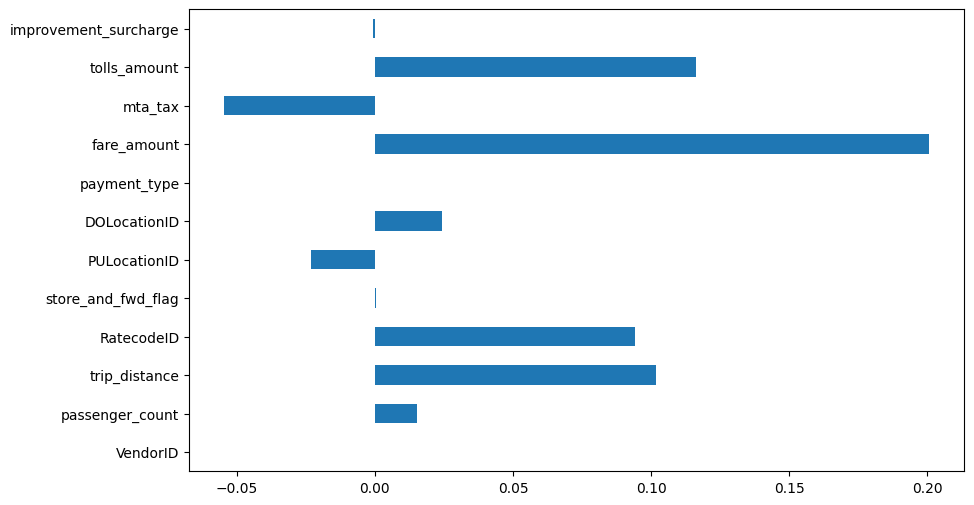

In [4]:
corr_values = df.corr()['tip_amount'].drop('tip_amount')
corr_values.plot(kind='barh', figsize=(10, 6))

In [5]:
df.dtypes

VendorID                   int64
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag         int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
mta_tax                  float64
tolls_amount             float64
improvement_surcharge      int64
tip_amount               float64
dtype: object

In [6]:
y = df['tip_amount'].values.astype('float')

x_val = df.drop(['tip_amount'], axis=1)

X = x_val.values
X = normalize(X, axis=1, norm='l1', copy=False)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
dt_reg = DecisionTreeRegressor(criterion='squared_error', max_depth=8, random_state=35)
dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)

mse_score = mean_squared_error(y_test, y_pred)
print("MSE Score: %.2f" % mse_score)

r2_score = dt_reg.score(X_test, y_test)
print("R^2 Score: %.2f" % r2_score)

MSE Score: 24.55
R^2 Score: 0.03


In [9]:
dt_reg1 = DecisionTreeRegressor(criterion='squared_error', max_depth=12, random_state=35)
dt_reg1.fit(X_train, y_train)

y_pred1 = dt_reg1.predict(X_test)

mse_score1 = mean_squared_error(y_test, y_pred1)
print("MSE Score: %.2f" % mse_score1)

r2_score1 = dt_reg1.score(X_test, y_test)
print("R^2 Score: %.2f" % r2_score1)

MSE Score: 26.51
R^2 Score: -0.05


<Axes: >

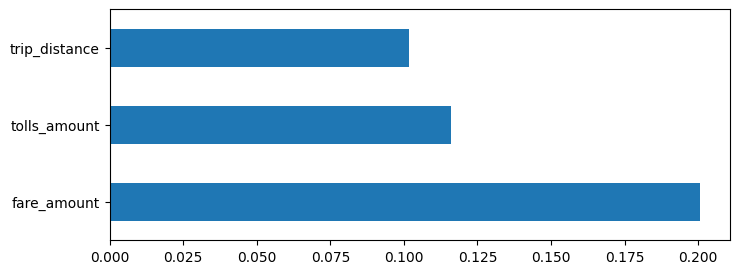

In [10]:
corr_values1 = df.corr()['tip_amount'].drop('tip_amount')
abs(corr_values1).sort_values(ascending=False)[:3].plot(kind='barh', figsize=(8, 3))

In [11]:
y = df['tip_amount'].values.astype('float')

x_val = df[['tolls_amount', 'mta_tax', 'fare_amount', 'DOLocationID', 'PULocationID', 'RatecodeID', 'trip_distance', 'passenger_count']]

X = x_val.values
X = normalize(X, axis=1, norm='l1', copy=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_reg1 = DecisionTreeRegressor(criterion='squared_error', max_depth=4, random_state=35)
dt_reg1.fit(X_train, y_train)

y_pred1 = dt_reg1.predict(X_test)

mse_score1 = mean_squared_error(y_test, y_pred1)
print("MSE Score: %.2f" % mse_score1)

r2_score1 = dt_reg1.score(X_test, y_test)
print("R^2 Score: %.2f" % r2_score1)

MSE Score: 24.47
R^2 Score: 0.03
